In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = (15, 6)
rcParams['image.cmap'] = 'viridis'
from scipy.stats import multivariate_normal
from scipy.stats import norm

# [2] Ирисы Фишера

In [2]:
from sklearn.datasets import load_iris

tmp = load_iris()
data, target = tmp['data'], tmp['target']
del tmp
print('data.shape: ', data.shape)
print('target:', set(target))

data.shape:  (150, 4)
target: {0, 1, 2}


### {1} Оценим параметры смеси

In [3]:
def estimateParams(X):
    '''
     X -- матрица для конкретного вида Ирисов;
     
    '''
    cov = np.cov(X.T)
    return np.mean(X, axis=0), cov

In [4]:
irises = {}
for i in range(3):
    tmp = estimateParams(data[target == i])
    print("SIZE of {}: {}".format(i, data[target == i].shape))
    irises[i] = {'data':data[target == i],'E':tmp[0], 'cov':tmp[1]}
    print('E:', tmp[0])
    print('Cov:\n', tmp[1])
    print('----')

SIZE of 0: (50, 4)
E: [ 5.006  3.418  1.464  0.244]
Cov:
 [[ 0.12424898  0.10029796  0.01613878  0.01054694]
 [ 0.10029796  0.14517959  0.01168163  0.01143673]
 [ 0.01613878  0.01168163  0.03010612  0.00569796]
 [ 0.01054694  0.01143673  0.00569796  0.01149388]]
----
SIZE of 1: (50, 4)
E: [ 5.936  2.77   4.26   1.326]
Cov:
 [[ 0.26643265  0.08518367  0.18289796  0.05577959]
 [ 0.08518367  0.09846939  0.08265306  0.04120408]
 [ 0.18289796  0.08265306  0.22081633  0.07310204]
 [ 0.05577959  0.04120408  0.07310204  0.03910612]]
----
SIZE of 2: (50, 4)
E: [ 6.588  2.974  5.552  2.026]
Cov:
 [[ 0.40434286  0.09376327  0.3032898   0.04909388]
 [ 0.09376327  0.10400408  0.07137959  0.04762857]
 [ 0.3032898   0.07137959  0.30458776  0.04882449]
 [ 0.04909388  0.04762857  0.04882449  0.07543265]]
----


### {2} 

Занумеруем координаты данных векторов числами 0, 1, 2, 3. 
* Для пар координат (0, 1), (1,3) и (2,3) вычислите плотность каждой компоненты смеси (три плотности для каждой пары координат), оценив параметры распределений по проекциям трех выборок (каждая выборка соответствует одной компоненте смеси) на соответствующие плоскости.
* Нарисуйте графики (рисовать нужно линии уровня) этих плотностей (3 × 3 = 9 штук), на которые нанесите также соответствующие проекции точек выборки.

In [5]:
def get_pair_dict(irises, pairs):
    pair_dict = {}
    for p in pairs:
        pair_dict[p] = {}
        for i in range(3):
            pair_dict[p][i] = {}
            mean = (irises[i]['E'][p[0]], irises[i]['E'][p[1]])
            # проще снова посчитать матрицу ковариаций для векторов p[0] и p[1]
            cov = np.cov(irises[i]['data'][:,p[0]], irises[i]['data'][:,p[1]])
            # здесь выбираем из данных ириса i-ого нужные координаты p:
            subsample = irises[i]['data'][:, p]
            # считаем вероятности для каждого наблюдения из subsample
            pair_dict[p][i]['rvs'] = multivariate_normal(mean=mean, cov = cov)
            pair_dict[p][i]['subsample'] = subsample
    return pair_dict

def draw_irises(irises, pairs):
    f, axes = plt.subplots(3,3)
    f.set_figheight(15)
    f.set_figwidth(15)
    pair_dict = get_pair_dict(irises, pairs)

    for i in range(3):
        for j,p in enumerate(pairs):
            tmp = pair_dict[p][i]['subsample']
            # далее странные действия лишь для того, 
                                # чтобы это нарисовалось;
            # Но несмотря на все старания линии все равно мохнатые.
            # Я не знаю, почему они мохнатые.
#             x1, y1 = np.meshgrid(tmp[:,0], tmp[:,1])
            x1,y1 = np.mgrid[min(tmp[:,0]):max(tmp[:,0]):0.01, min(tmp[:,1]):max(tmp[:,1]):0.01]
            pos = np.empty(x1.shape + (2,))
            pos[:, :, 0] = x1
            pos[:, :, 1] = y1
            density = pair_dict[p][i]['rvs'].pdf(pos)
            axes[i,j].contourf(x1, y1, density)
            axes[i,j].scatter(tmp[:,0], tmp[:,1], c='r')
            axes[i,j].set_title("Iris type = {}\n axes: {}".format(i,p))

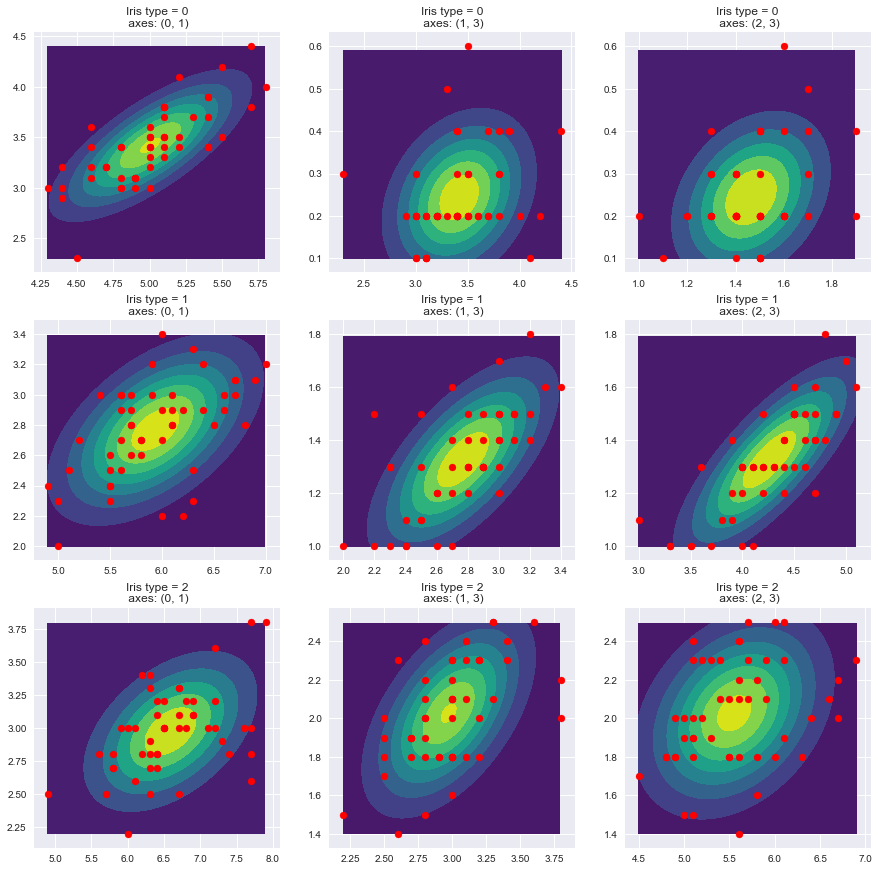

In [6]:
pairs = [(0,1), (1,3), (2,3)]
draw_irises(irises, pairs)

### {3} 
* Оцените вероятности $P(𝑇 = 𝑘)$ частотами вхождений 𝑘-ых компонент смеси в данную выборку.
* На основе полученных оценок вычислите условное математическое ожидание $E(X|T \neq k)$ для всех $k = 1,2,3$ (три числа).

Оценим P(𝑇=𝑘) с помощью частот вхождений элементов разных классов в выборку.
Очевидно, что частоты везде одинаковые, т.к. выборка уравновешенная 
и для каждого класса i соответствующий подкласс будет иметь 50/50 представителей, оставшихся кроме i, классов;

Поэтому я действительно не понимаю это задание.
Однако искомые числа будут следующие:

* [0] 0.5*1+0.5*2 = 1.5
* [1] 0.5*2 = 1
* [2] 0.5*1 = 0.5

### {4}

Для пар координат (0,1), (1,3) и (2,3) получите новые оценки (распределения T)

и постройте графики условной плотности $p_{(𝑋|I (T \neq k))}(x|1)$ (9 штук).

In [7]:
## Построим такой же датасет для инвертированных ирисов:
inv_irises = {}
for i in range(3):
    tmp = estimateParams(data[target != i])
    print("SIZE of {}: {}".format(i, data[target != i].shape))
    inv_irises[i] = {'data':data[target != i],'E':tmp[0], 'cov':tmp[1]}
    print('E:', tmp[0])
    print('Cov:\n', tmp[1])
    print('----')

SIZE of 0: (100, 4)
E: [ 6.262  2.872  4.906  1.676]
Cov:
 [[ 0.43934949  0.12215758  0.45336162  0.1671596 ]
 [ 0.12215758  0.11072323  0.14279596  0.08002828]
 [ 0.45336162  0.14279596  0.6815798   0.28873131]
 [ 0.1671596   0.08002828  0.28873131  0.18042828]]
----
SIZE of 1: (100, 4)
E: [ 5.797  3.196  3.508  1.135]
Cov:
 [[ 0.89362727 -0.08132525  1.79123636  0.74141919]
 [-0.08132525  0.17311515 -0.4172404  -0.17056566]
 [ 1.79123636 -0.4172404   4.38579394  1.86658586]
 [ 0.74141919 -0.17056566  1.86658586  0.84492424]]
----
SIZE of 2: (100, 4)
E: [ 5.471  3.094  2.862  0.785]
Cov:
 [[ 0.41177677 -0.06037778  0.75514949  0.28693434]
 [-0.06037778  0.2266303  -0.41083636 -0.151     ]
 [ 0.75514949 -0.41083636  2.09833939  0.8029596 ]
 [ 0.28693434 -0.151       0.8029596   0.32068182]]
----


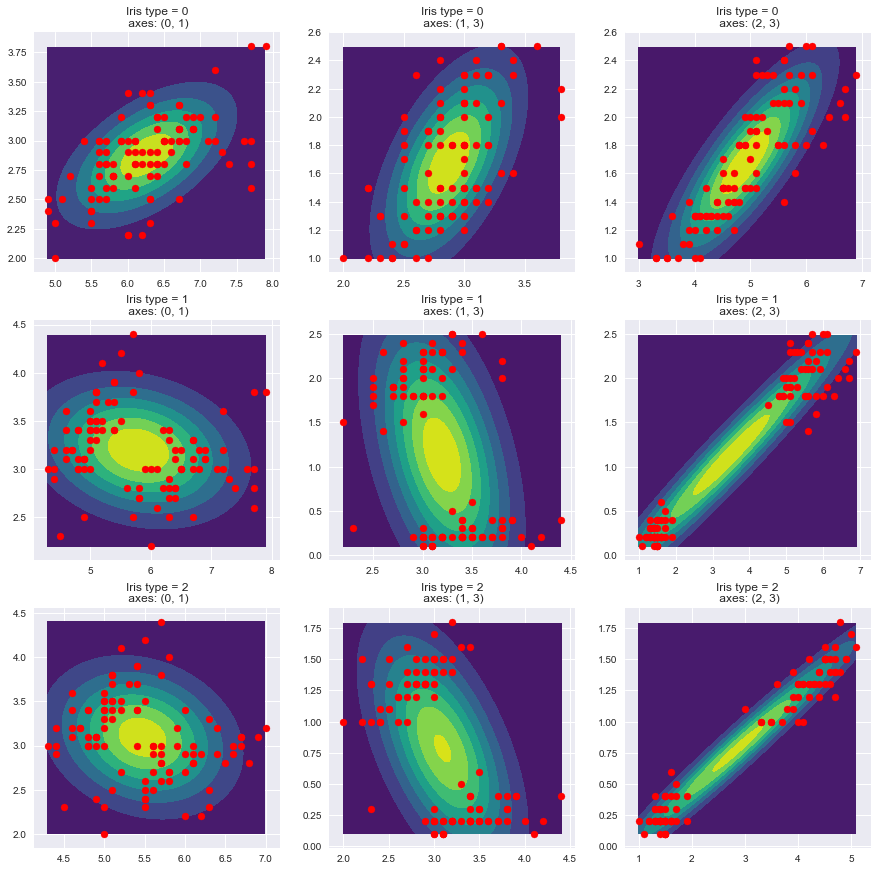

In [8]:
pairs = [(0,1), (1,3), (2,3)]
draw_irises(inv_irises, pairs)

### {5}

* Классифицируйте все пространство 4-мерных векторов по принципу:


$$𝑘 = {argmax}_{k} p_{(X|I (T \neq k))}(x|1)$$

(здесь условная плотность и оценка распределения 𝑇 считается на основе оценок для 4-мерных векторов).

* Посчитайте долю ошибок на выборке. 
* Нарисуйте классификацию всего пространства в проекции на пары координат (0, 1), (1, 3) и (2, 3), где закрасьте разными цветами области, которые образовались в результате классификации.

Как я это понимаю простым языком:
для каждого сэмпла для оценок из inv_irises мы проверяем для какого класса pdf выходит больше;
соответствующий лейбл и присваиваем сэмплу.
А теперь реализация.

In [9]:
class ArgmaxClassifier():
    def __init__(self):
        self.irises = None
        self.rvs = []
    def fit(self, irises):
        self.irises = irises
        for i in range(3):
            mean = self.irises[i]['E']
            cov = self.irises[i]['cov']
            self.rvs.append(multivariate_normal(mean=mean, cov = cov))
    def predict_sample(self, sample):
        res = np.argmax([self.rvs[i].pdf(sample) for i in range(3)])
        return res
    def predict(self, X):
        return np.array(list(map(self.predict_sample, X)))

In [10]:
clf = ArgmaxClassifier()
clf.fit(inv_irises)
result_max = clf.predict(data)
error = np.sum(result_max != target)/len(target)
print('Errors: {}% '.format(np.round(error*100,2)))

Errors: 96.67% 


О, да. Мы получили, что классификатор работает наоборот. Это и неудивительно, т.к. сейчас он выбирает исключительно тот лейбл, на который данный сэмпл похож меньше всего.
Попробуем сделать вместо argmax argmin.

In [11]:
class ArgminClassifier(ArgmaxClassifier):
    def predict_sample(self, sample):
        res = np.argmin([self.rvs[i].pdf(sample) for i in range(3)])
        return res

In [12]:
clf = ArgminClassifier()
clf.fit(inv_irises)
result_min = clf.predict(data)
error = np.sum(result_min != target)/len(target)
print('Errors: {}% '.format(np.round(error*100,2)))

Errors: 11.33% 


И вот мы получили достаточно неплохой классификатор.

Теперь визуализируем предсказания.

In [13]:
def draw_predictions(data, pairs, predictions):
    
    color_set = ['m', 'y', 'c']
    colors = [color_set[i] for i in predictions]
    
    for j,p in enumerate(pairs):
        tmp = data[:, p]
        plt.figure(figsize=(10,10))
        plt.scatter(tmp[:,0], tmp[:,1], c=colors)
        plt.title("Axes: {}".format(p))
        plt.show()

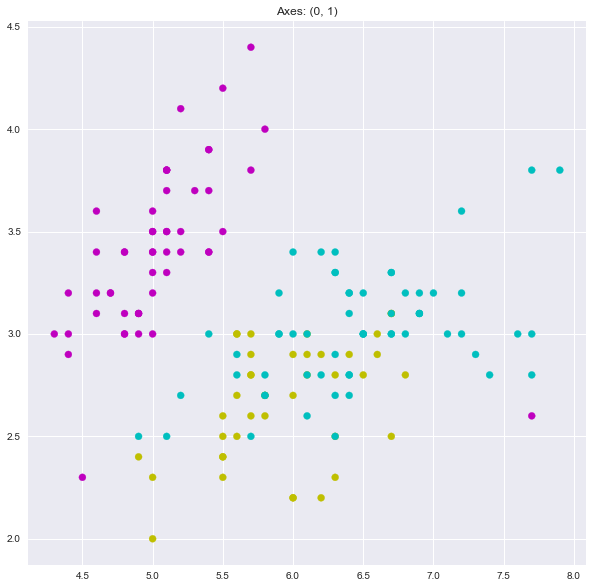

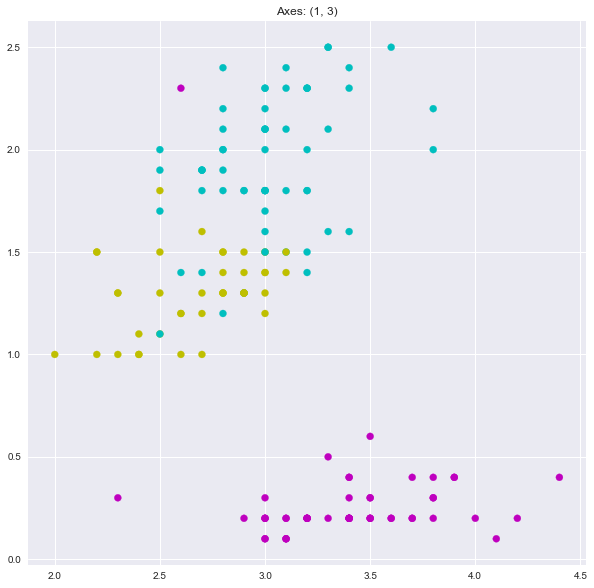

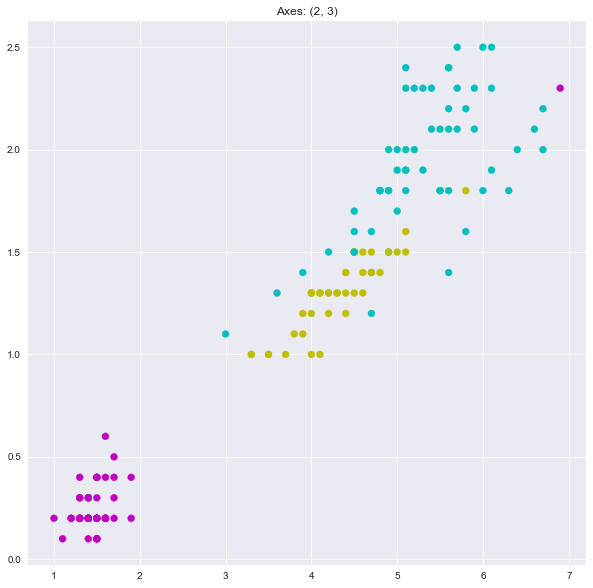

In [14]:
## Визуализация для ArgMin классификатора:
draw_predictions(data, pairs, result_min)

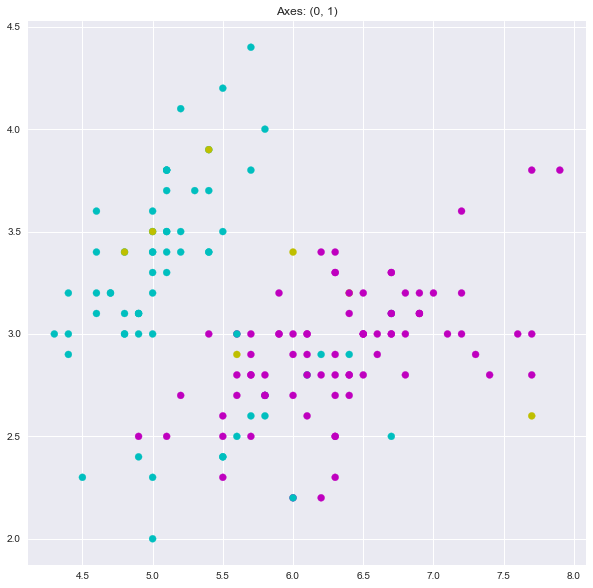

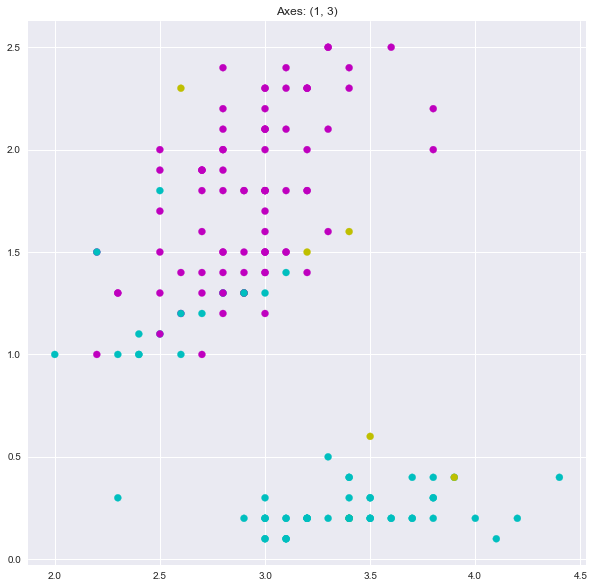

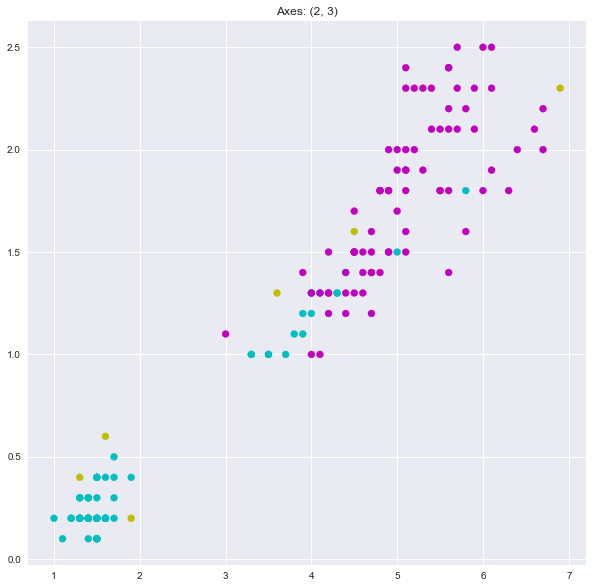

In [15]:
## Визуализация для ArgMax классификатора:
draw_predictions(data, pairs, result_max)